# Netflix Exploratory Data Analysis

This data analysis project for a Netflix dataset aims to explore and analyze a rich collection of TV shows and movies available on the platform to gain insights into user behavior and preferences, identify popular genres and trends, and draw meaningful conclusions and recommendations for the streaming service and the entertainment industry.

Through a combination of statistical analysis and data visualization techniques, we will examine the data and look for patterns and trends that can help us understand the popularity of certain types of content and how they relate to user behavior. We will analyze factors such as the genre, cast, release year, country of origin, and rating to identify what types of content are most popular among viewers.

Additionally, we will use data visualization techniques to showcase our findings and communicate our insights effectively. For example, we may create pie charts or bar graphs to display the distribution of genres or countries of origin of content, or use heatmaps to show the popularity of content across different release years.

Overall, this data analysis project for a Netflix dataset provides an opportunity to gain valuable insights into user preferences and content trends that can be leveraged to inform recommendations for the streaming service and the entertainment industry.

In [2]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Import CSV file containing data set

In [4]:
main_df = pd.read_csv("netflix_titles.csv")
main_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

Information about the data set

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Visualize missing values

<AxesSubplot:>

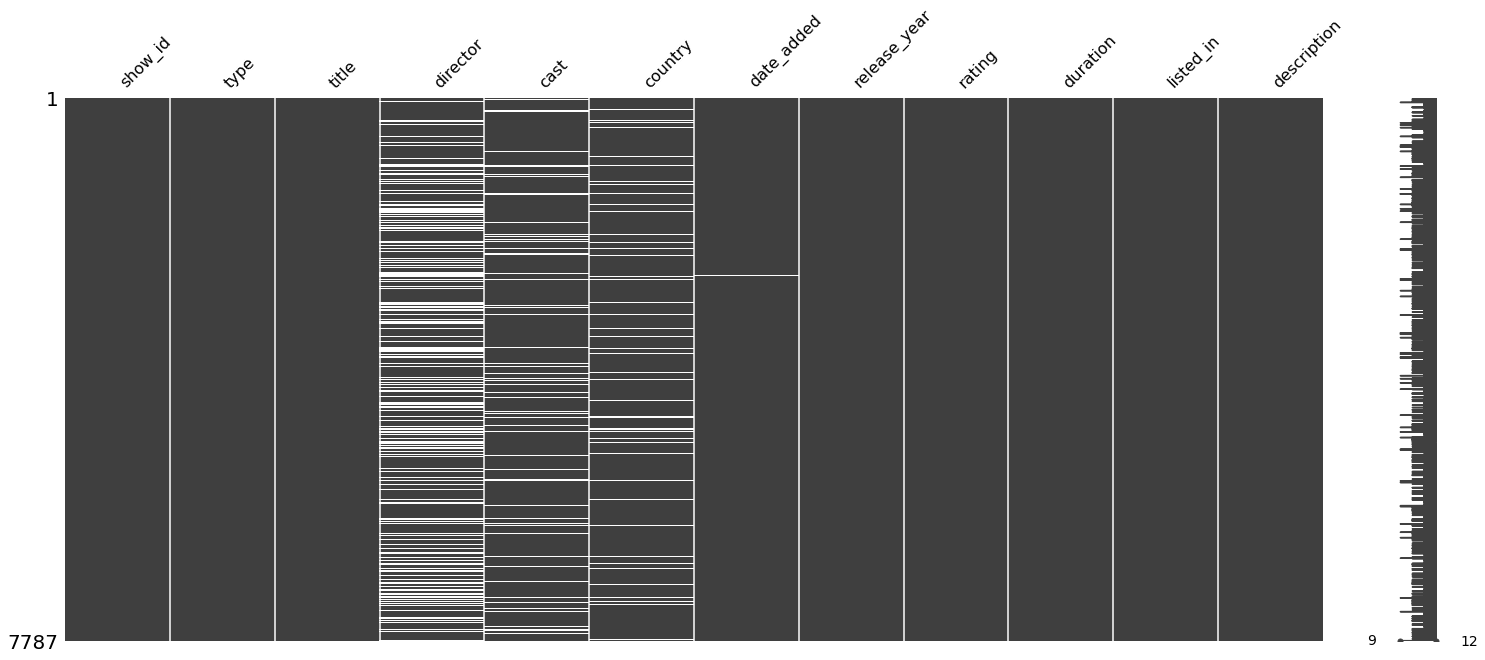

In [6]:
msno.matrix(main_df)

<AxesSubplot:>

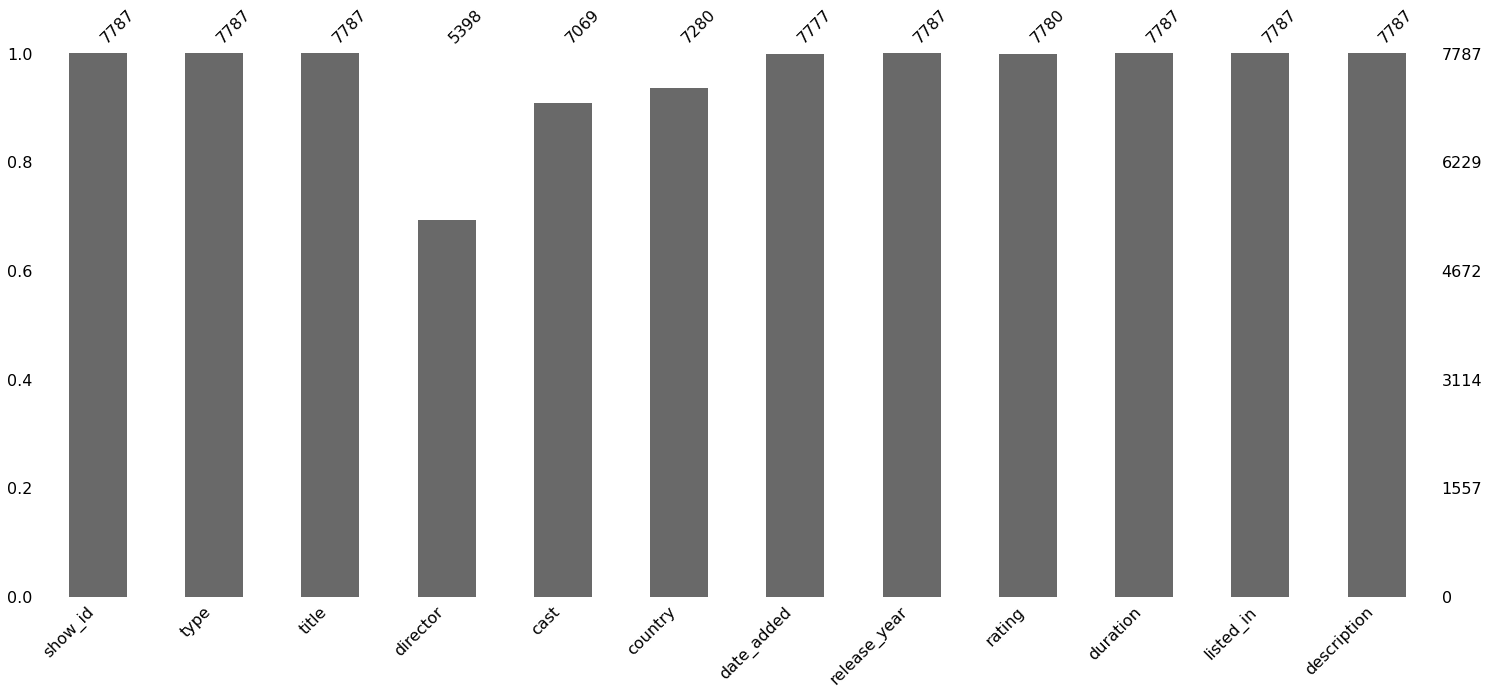

In [7]:
msno.bar(main_df)

Heatmap depicting visualization of relationship of missing values 

<AxesSubplot:>

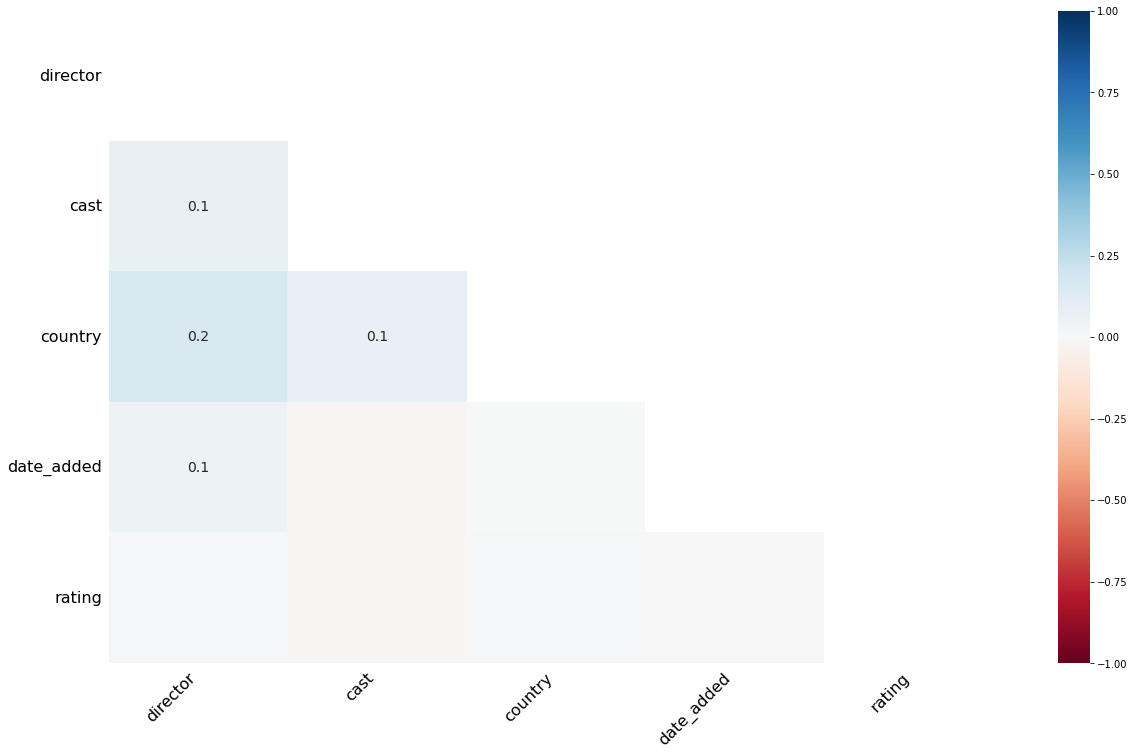

In [8]:
msno.heatmap(main_df)

Display null rates of the columns

In [9]:
for i in main_df.columns:
    null_rate = main_df[i].isnull().sum()/len(main_df)*100
    if null_rate > 0:
        print("{}'s null rate is {}%".format(i,round(null_rate,2)))

director's null rate is 30.68%
cast's null rate is 9.22%
country's null rate is 6.51%
date_added's null rate is 0.13%
rating's null rate is 0.09%


No of unique values in each column

In [10]:
main_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

Number of null values in the columns

In [11]:
main_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Unique values of the rating column

In [12]:
main_df["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

Rows with null values in the rating column

In [13]:
main_df[main_df["rating"].isna()]

show_id     type                                              title  \
67       s68    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
2359   s2360  TV Show                  Gargantia on the Verdurous Planet   
3660   s3661  TV Show                                       Little Lunch   
3736   s3737    Movie                                    Louis C.K. 2017   
3737   s3738    Movie                              Louis C.K.: Hilarious   
3738   s3739    Movie               Louis C.K.: Live at the Comedy Store   
4323   s4324    Movie                               My Honor Was Loyalty   

             director                                               cast  \
67                NaN                        Oprah Winfrey, Ava DuVernay   
2359              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
3660              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
3736       Louis C.K.                                         Louis C.K.   
3737       Louis C.K.                                         Louis C.K.   
3738       Louis C.K.                                         Louis C.K.   
4323  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

            country          date_added  release_year rating  duration  \
67              NaN    January 26, 2017          2017    NaN    37 min   
2359          Japan    December 1, 2016          2013    NaN  1 Season   
3660      Australia    February 1, 2018          2015    NaN  1 Season   
3736  United States       April 4, 2017          2017    NaN    74 min   
3737  United States  September 16, 2016          2010    NaN    84 min   
3738  United States     August 15, 2016          2015    NaN    66 min   
4323          Italy       March 1, 2017          2015    NaN   115 min   

                                 listed_in  \
67                                  Movies   
2359  Anime Series, International TV Shows   
3660                 Kids' TV, TV Comedies   
3736                                Movies   
3737                                Movies   
3738                                Movies   
4323                                Dramas   

                                            description  
67    Oprah Winfrey sits down with director Ava DuVe...  
2359  After falling through a wormhole, a space-dwel...  
3660  Adopting a child's perspective, this show take...  
3736  Louis C.K. muses on religion, eternal love, gi...  
3737  Emmy-winning comedy writer Louis C.K. brings h...  
3738  The comic puts his trademark hilarious/thought...  
4323  Amid the chaos and horror of World War II, a c...

Insert values in the ratings column that were null

In [14]:
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA'
}
for id,rate in rating_replacements.items():
    main_df.iloc[id,8] = rate
main_df['rating'].isna().sum()

0

Drop columns director and cast

In [15]:
main_df = main_df.drop(["director", "cast"], axis=1)
main_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Rows with null values in the date_Added column

In [16]:
main_df[main_df['date_added'].isna()]

show_id     type                                        title  \
258     s259  TV Show  A Young Doctor's Notebook and Other Stories   
549     s550  TV Show              Anthony Bourdain: Parts Unknown   
2263   s2264  TV Show                                      Frasier   
2288   s2289  TV Show                                      Friends   
2555   s2556  TV Show                              Gunslinger Girl   
3374   s3375  TV Show                                     Kikoriki   
3492   s3493  TV Show                          La Familia P. Luche   
3946   s3947  TV Show                                        Maron   
5137   s5138  TV Show                                 Red vs. Blue   
6065   s6066  TV Show                 The Adventures of Figaro Pho   

             country date_added  release_year rating    duration  \
258   United Kingdom        NaN          2013  TV-MA   2 Seasons   
549    United States        NaN          2018  TV-PG   5 Seasons   
2263   United States        NaN          2003  TV-PG  11 Seasons   
2288   United States        NaN          2003  TV-14  10 Seasons   
2555           Japan        NaN          2008  TV-14   2 Seasons   
3374             NaN        NaN          2010   TV-Y   2 Seasons   
3492   United States        NaN          2012  TV-14   3 Seasons   
3946   United States        NaN          2016  TV-MA   4 Seasons   
5137   United States        NaN          2015     NR  13 Seasons   
6065       Australia        NaN          2015  TV-Y7   2 Seasons   

                                              listed_in  \
258            British TV Shows, TV Comedies, TV Dramas   
549                                          Docuseries   
2263                     Classic & Cult TV, TV Comedies   
2288                     Classic & Cult TV, TV Comedies   
2555                       Anime Series, Crime TV Shows   
3374                                           Kids' TV   
3492  International TV Shows, Spanish-Language TV Sh...   
3946                                        TV Comedies   
5137  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6065                              Kids' TV, TV Comedies   

                                            description  
258   Set during the Russian Revolution, this comic ...  
549   This CNN original series has chef Anthony Bour...  
2263  Frasier Crane is a snooty but lovable Seattle ...  
2288  This hit sitcom follows the merry misadventure...  
2555  On the surface, the Social Welfare Agency appe...  
3374  A wacky rabbit and his gang of animal pals hav...  
3492  This irreverent sitcom featues Ludovico, Feder...  
3946  Marc Maron stars as Marc Maron, who interviews...  
5137  This parody of first-person shooter games, mil...  
6065  Imagine your worst fears, then multiply them: ...

In [17]:
main_df = main_df[main_df["date_added"].notna()]

In [18]:
main_df['country'] = main_df['country'].fillna(main_df['country'].mode()[0])

In [19]:
main_df['principal_country'] = main_df['country'].apply(lambda x:x.split(',')[0])
main_df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

In [20]:
main_df.isna().sum()

show_id              0
type                 0
title                0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
principal_country    0
dtype: int64

In [21]:
main_df["year_added"] = main_df["date_added"].apply(lambda x: x.split(" ")[-1])
main_df.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020          2020   
1      s2    Movie   7:19         Mexico  December 23, 2016          2016   
2      s3    Movie  23:59      Singapore  December 20, 2018          2011   
3      s4    Movie      9  United States  November 16, 2017          2009   
4      s5    Movie     21  United States    January 1, 2020          2008   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description principal_country  \
0  In a future where the elite inhabit an island ...            Brazil   
1  After a devastating earthquake hits Mexico Cit...            Mexico   
2  When an army recruit is found dead, his fellow...         Singapore   
3  In a postapocalyptic world, rag-doll robots hi...     United States   
4  A brilliant group of students become card-coun...     United States   

  year_added  
0       2020  
1       2016  
2       2018  
3       2017  
4       2020

In [22]:
main_df["month_added"] = main_df["date_added"].apply(lambda x: x.split(" ")[0])
main_df["month_added"].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [23]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

main_df['target_ages'] = main_df['rating'].replace(ratings_ages)
main_df['target_ages'].unique() 


array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [24]:
main_df['type'] = pd.Categorical(main_df['type'])
main_df['target_ages'] = pd.Categorical(main_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
main_df['year_added'] = pd.to_numeric(main_df['year_added'])

In [ ]:
main_df.dtypes

Pie chart to visualize TV v/s Movie distribution

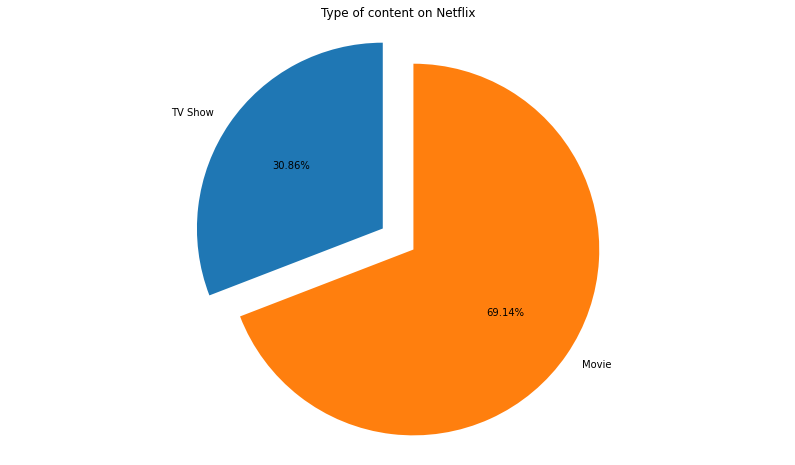

In [26]:
py.figure(figsize=(14,8))
py.pie(main_df['type'].value_counts().sort_values(),labels = ['TV Show','Movie'],explode = [0.1,0.1], autopct='%1.2f%%',startangle =90)
py.title("Type of content on Netflix")
py.axis('equal')
py.show()


In [27]:
df_tv = main_df[main_df["type"]=='TV Show']
df_movie = main_df[main_df["type"]=='Movie']


Point plot to visualize top movie ratings

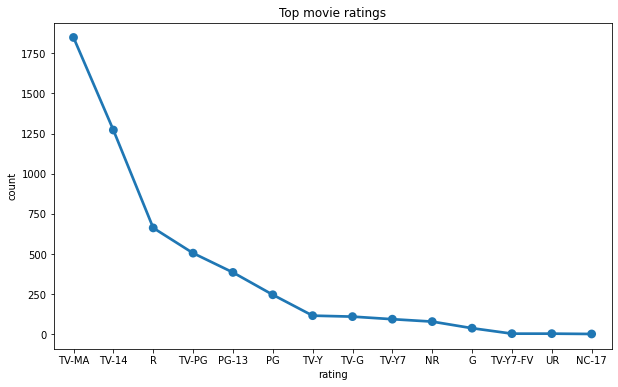

In [28]:
movie_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig, ax = py.subplots(figsize=(10,6))
sns.pointplot(x='rating', y='count', data=movie_ratings)
py.title('Top movie ratings')
py.show()

Point plot to visualize top movie ratings

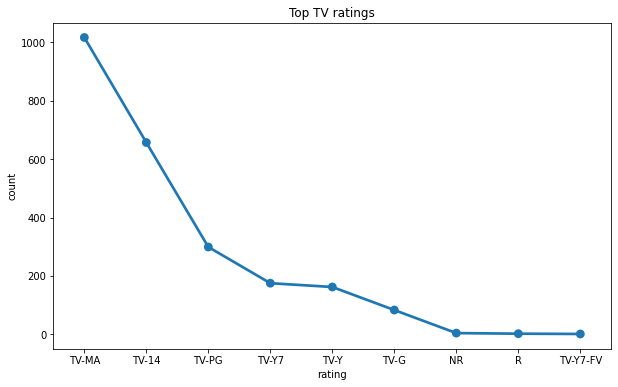

In [29]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig, ax = py.subplots(figsize=(10,6))
sns.pointplot(x='rating', y='count', data=tv_ratings)
py.title('Top TV ratings')
py.show()

In [30]:
def generate_rating_df(main_df):
    rating_df = main_df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [31]:
rating_df = generate_rating_df(main_df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', 
             title='Ratings of Movies And TV Shows Based On Target Age Groups',  
             labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()


In [32]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movie['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = py.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    py.show()

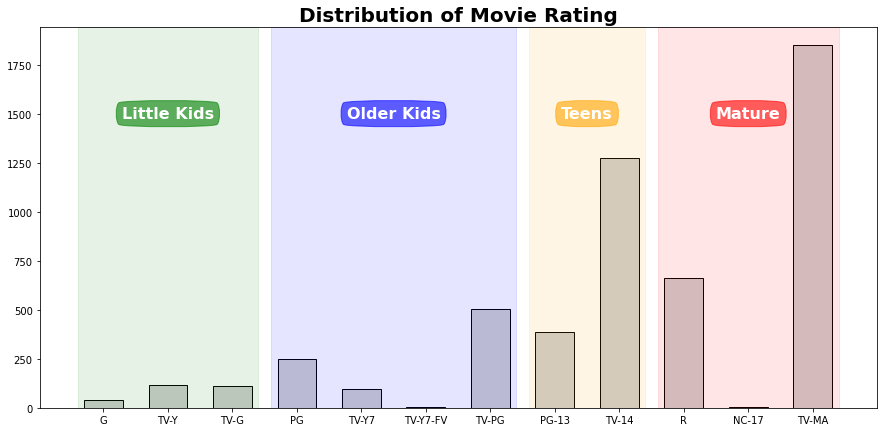

In [33]:
rating_barplot(movie_rating,'Movie', 1500)

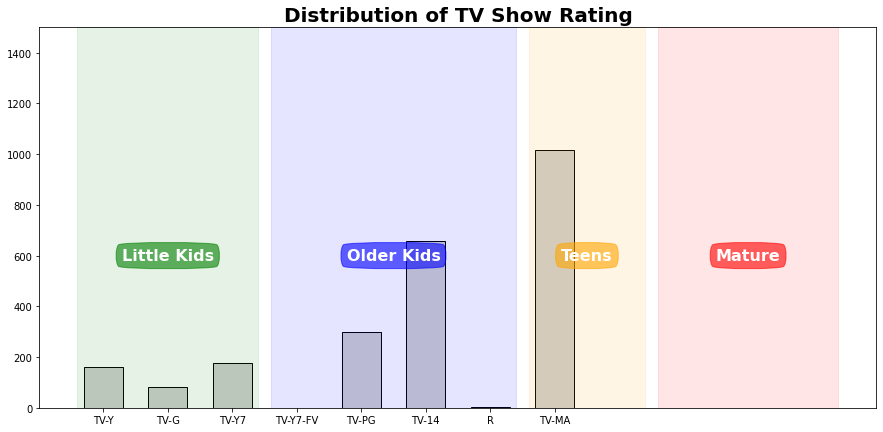

In [34]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)

In [35]:
df_content = main_df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movies1 = df_movie['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="royalblue"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="red"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="gold"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

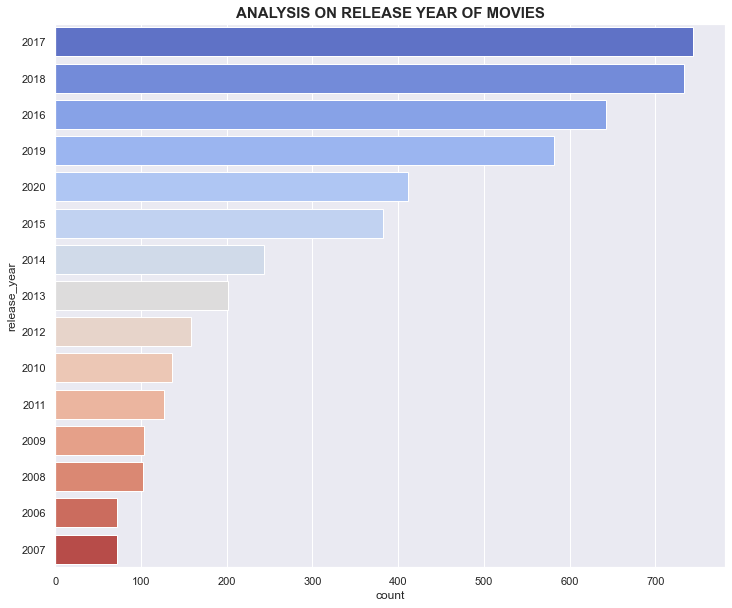

In [36]:
py.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_movie, palette="coolwarm", 
                   order=df_movie['release_year'].value_counts().index[0:15])

py.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
py.show()


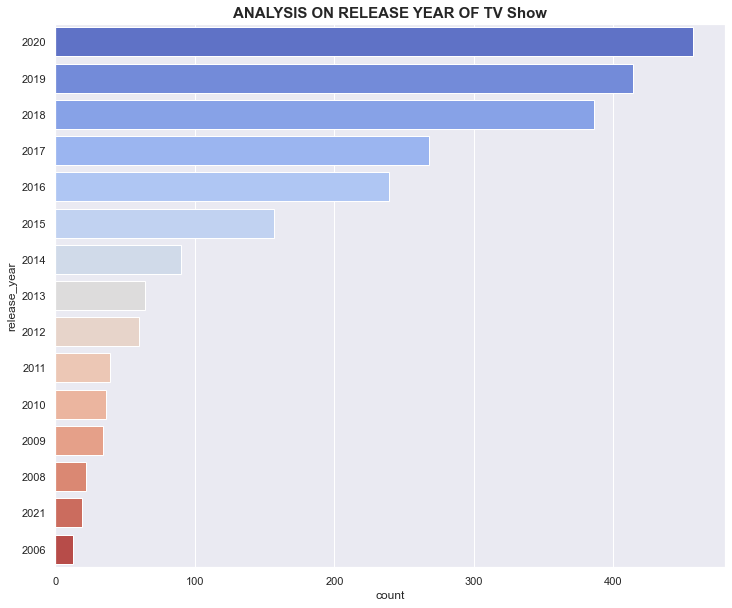

In [37]:
py.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm", order=df_tv['release_year'].value_counts().index[0:15])

py.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
py.show()

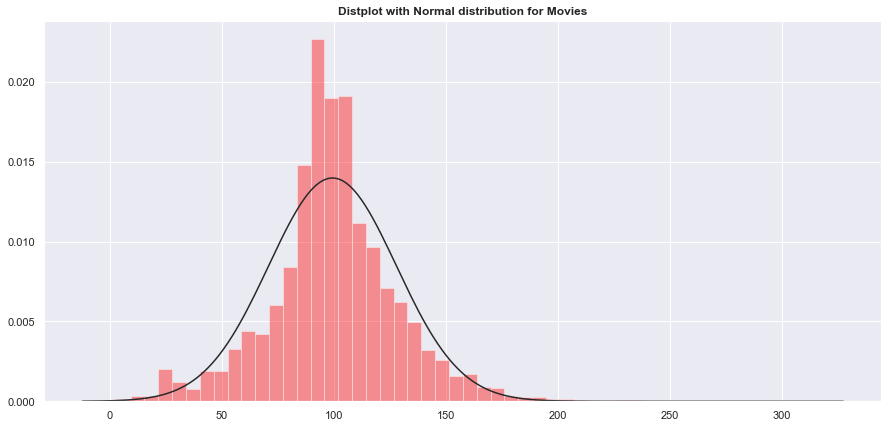

In [38]:
from scipy.stats import norm

py.figure(figsize=(15,7))
sns.distplot(df_movie['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['red'])
py.title('Distplot with Normal distribution for Movies',fontweight="bold")
py.show()

In [39]:
fig = px.histogram(x=df_tv['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of TV Shows duration",
    xaxis_title="Duration of TV ShowS",
)
fig.show()

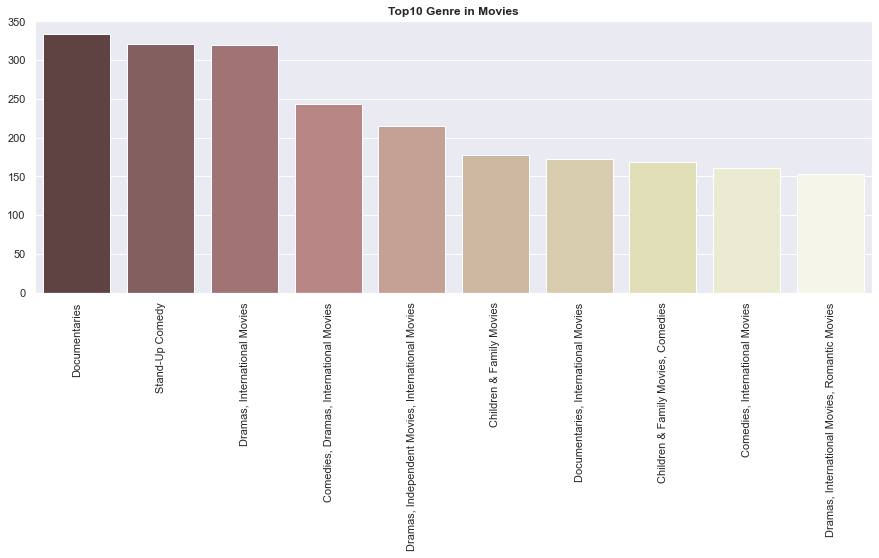

In [40]:
py.figure(figsize=(15,5))
sns.barplot(x = df_movie["listed_in"].value_counts().head(10).index,
            y = df_movie["listed_in"].value_counts().head(10).values,palette="pink")
py.xticks(rotation = 90)
py.title("Top10 Genre in Movies",fontweight="bold")
py.show()

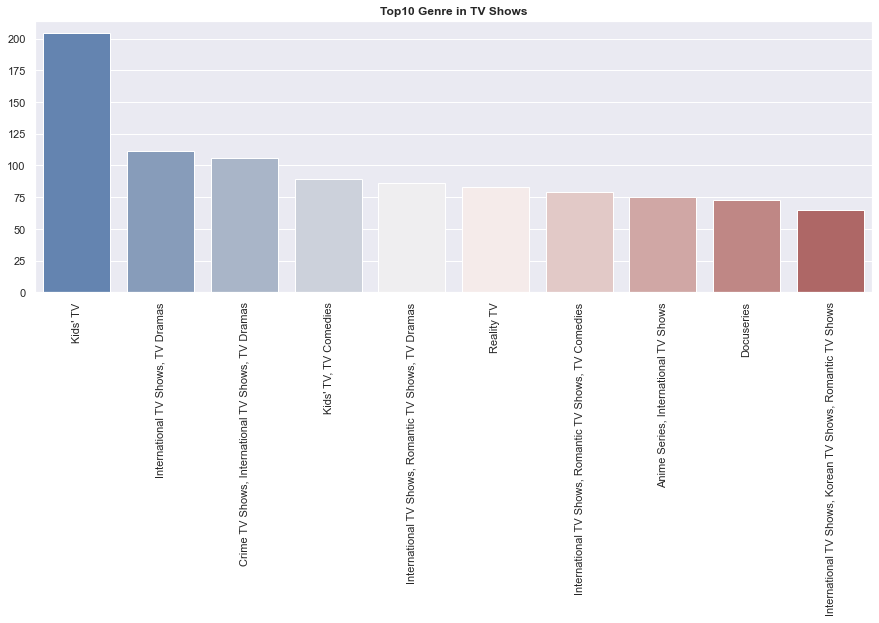

In [41]:
py.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
py.xticks(rotation=90)
py.title("Top10 Genre in TV Shows",fontweight="bold")
py.show()

In [42]:
from collections import Counter
country_data = main_df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(20)

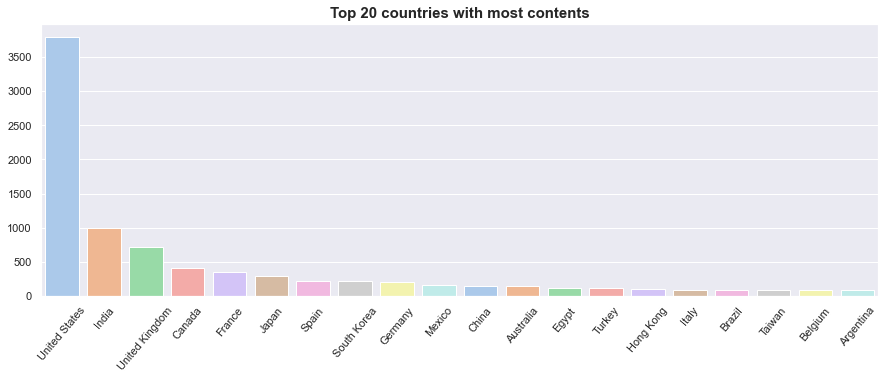

In [43]:
py.figure(figsize=(15,5))
sns.barplot(x= top20country.index, y=top20country, palette="pastel")
py.xticks(rotation=50)
py.title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
py.show()

In [81]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


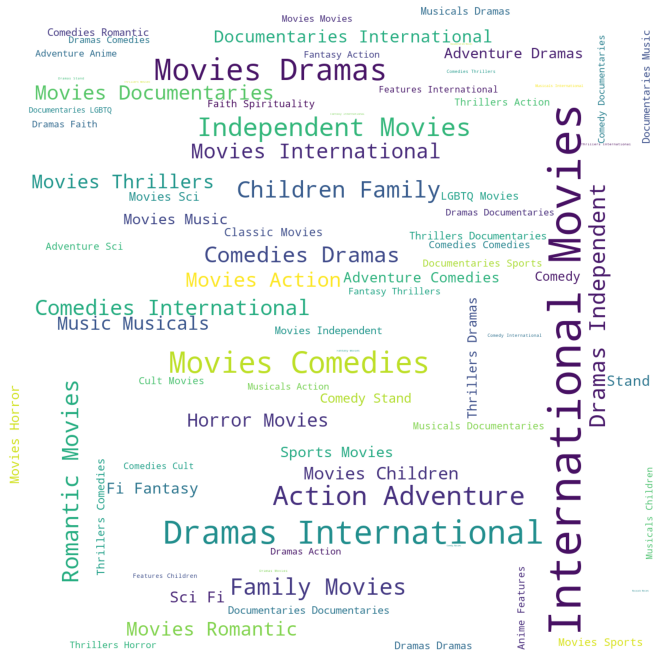

In [44]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movie['listed_in'])

py.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
py.imshow(wordcloud)
py.axis('off')
py.show()

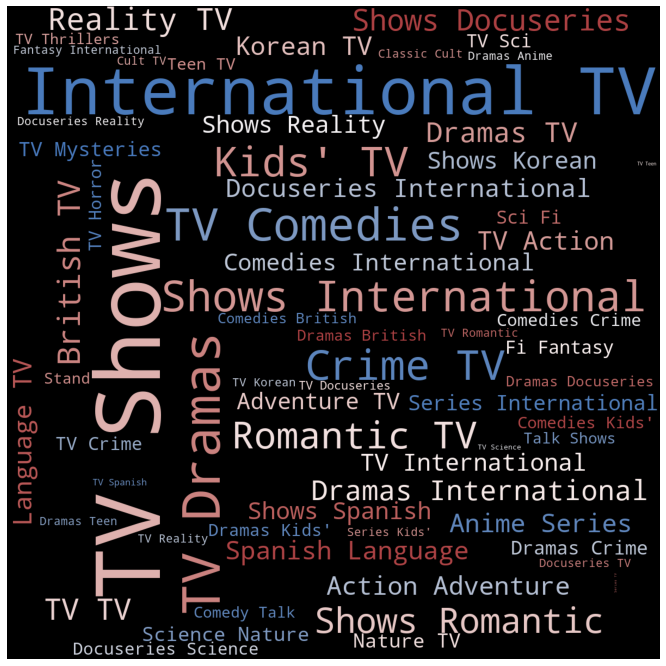

In [45]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

py.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', 
                      width = 1200,  height = 1200, max_words = 121).generate(text)
py.imshow(wordcloud)
py.axis('off')
py.show()